In [16]:
import streamlit as st
import numpy as np
import pandas as pd 
from db_manager import Postgres

def load_data():
    db = Postgres()
    euribor = pd.read_sql(
        'SELECT eur_date, eur_12m, eur_year FROM orchard.euribor', 
        db.conn
        )
    df_eur = euribor.set_index('eur_date')
    df_eur.index = pd.to_datetime(df_eur.index)
    df_eur = df_eur.astype({'eur_year': np.int16})
    return df_eur

In [17]:
df = load_data()

In [32]:
from datetime import datetime, timedelta



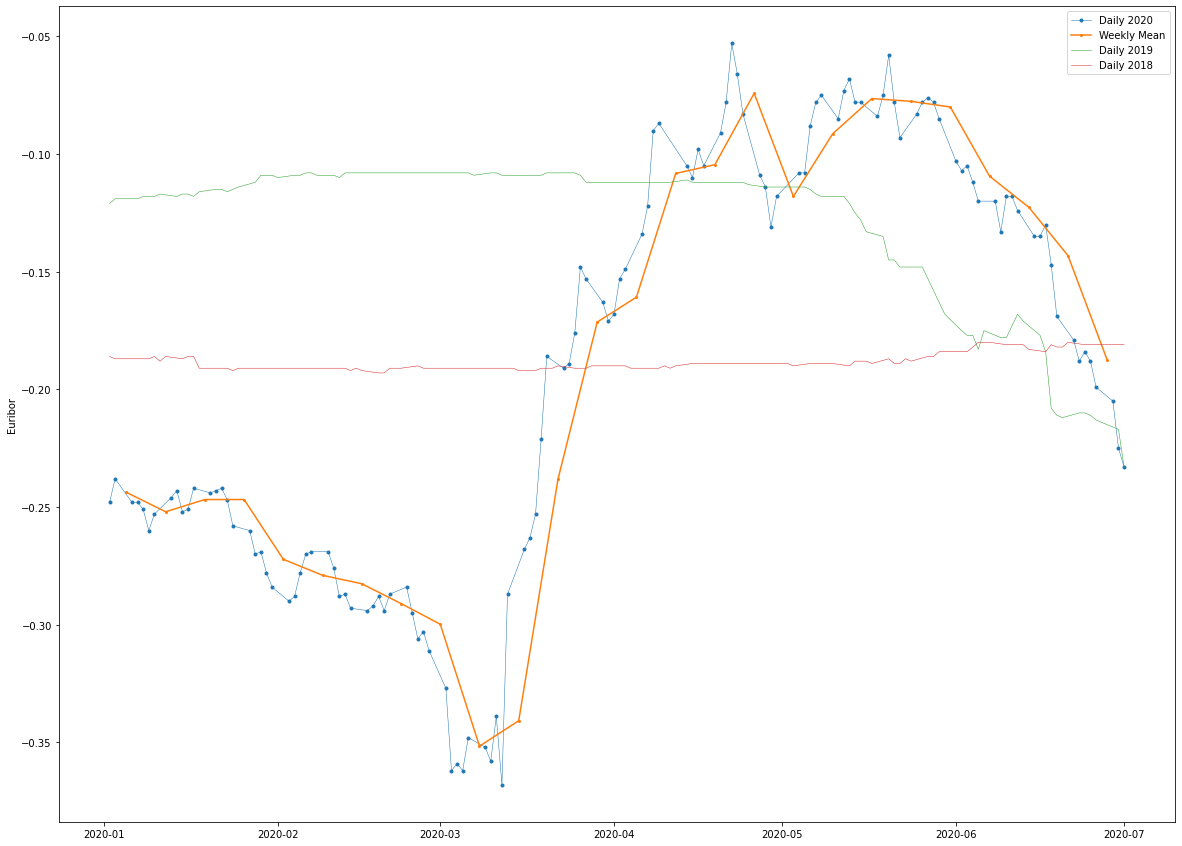

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'eur_12m'
year = timedelta(365)
two_years = timedelta(730)

temp_weekly_mean = df[[col]].resample('W').mean()
    
euribor_2019 = df.loc[start-year:end-year, col]
euribor_2019.index = euribor_2019.index + pd.DateOffset(days=365)
    
euribor_2018 = df.loc[start-two_years:end-two_years, col]
euribor_2018.index = euribor_2018.index + pd.DateOffset(days=365*2)
    
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(20,15))
    
# Fisrt Plot 
ax.plot(
    df.loc[start:end, col],
    marker='.', linestyle='-', linewidth=0.5, label='Daily 2020'
)
    
# Second Plot
ax.plot(
    temp_weekly_mean.loc[start:end, col],
    marker='o', markersize=2, linestyle='-', label='Weekly Mean'
)
    
# euribor_2019
ax.plot(
    euribor_2019,
    linestyle='-', linewidth=0.5, label='Daily 2019'
)
    
# euribor_2018
ax.plot(
    euribor_2018,
  linestyle='-', linewidth=0.5, label='Daily 2018'
)
    
ax.set_ylabel('Euribor')
ax.legend();
